In [ ]:
## some solar data now!

## file format: FITS 'Flexible Image Transport System'
## https://fits.gsfc.nasa.gov/

## url for data file

url = 'https://lasp.colorado.edu/eve/data_access/eve_data/products/level2'

year = '2011'
doy = '046'
FITSfile = 'EVS_L2_2011046_00_007_02.fit.gz'
sep = '/'

url_file = sep.join((url,year,doy,FITSfile))

print(url_file)

https://lasp.colorado.edu/eve/data_access/eve_data/products/level2/2011/046/EVS_L2_2011046_00_007_02.fit.gz


In [ ]:
## read EVE spectra

def read_eve(FITSfile):
  from astropy.io import fits
  ## open FITS file
  hdu = fits.open(FITSfile)
  ## date
  dat = hdu[3].data['YYYYDOY']
  ## SOD = seconds of day (tempo)
  sod = hdu[3].data['SOD']
  ## array wavelength (comprimento de onda)
  wav = hdu[1].data['WAVELENGTH']
  ## array spectra (irradiance W/m2/nm)
  irr = hdu[3].data['IRRADIANCE'] # time,irr (360,5200)
  hdu.close()
  return wav,sod,irr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

wav,sod,irr = read_eve(url_file)

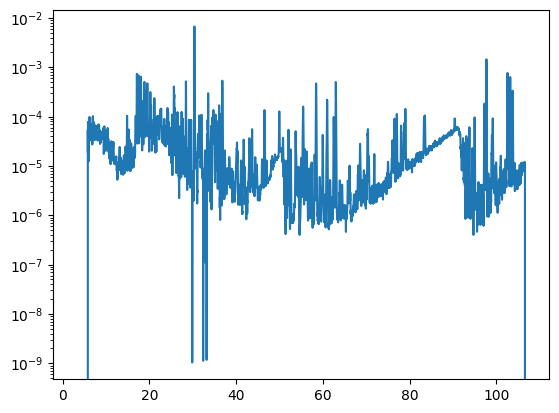

In [ ]:
plt.semilogy(wav,irr[0,:])

(97.2, 98.2)

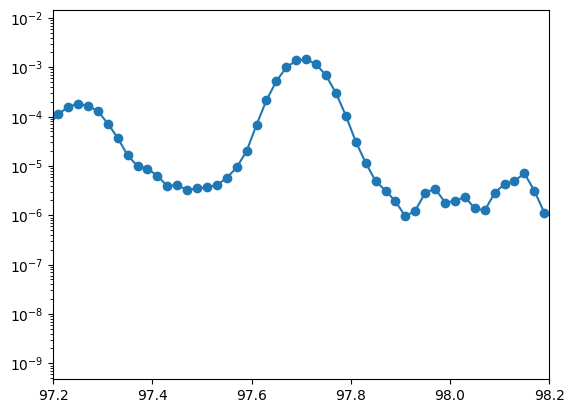

In [ ]:
plt.semilogy(wav,irr[0,:],marker='o')
plt.xlim(97.7-0.5,97.7+0.5)

[ 39.9  29.7   0.3  30.1  40.   50.  153. ]
2
4734 97.69
2


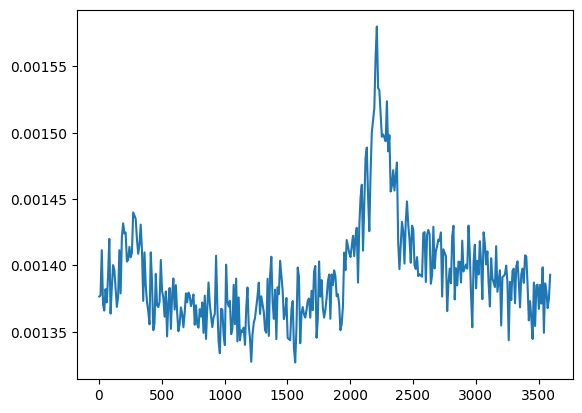

In [ ]:
a = np.array([10.1,20.3,50.3,80.1,90,100.,203])
value = 50
b = np.abs(a - value)
print(b)
print(b.argmin())

def find_nearest(array,value):
  return np.abs(array-value).argmin()

w = 97.7
index = find_nearest(wav,w)
print(index,wav[index])

print(find_nearest(a,value))

plt.plot(sod,irr[:,index])

6.283185307179586
164 6.29


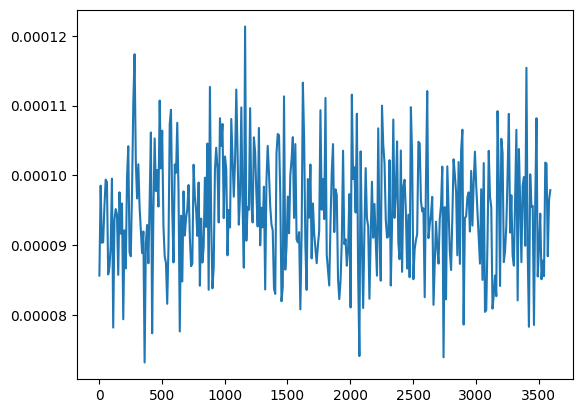

In [ ]:
indmax = irr[:,index].argmax()


w1 = 2*np.pi
print(w1)
index = find_nearest(wav,w1)
print(index,wav[index])

plt.plot(sod,irr[:,index])

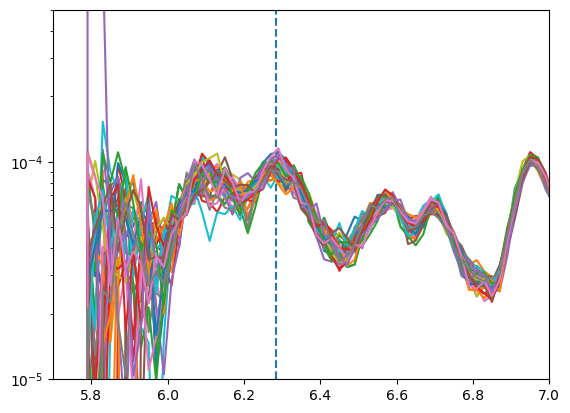

In [ ]:
plt.semilogy(wav,irr[0,:])
plt.semilogy(wav,irr[indmax,:])
plt.xlim(5.7,7)
plt.axvline(w1,linestyle='dashed')
plt.ylim(1e-5,5e-4)

for i in range(0,len(sod),10):
  plt.semilogy(wav,irr[i,:])

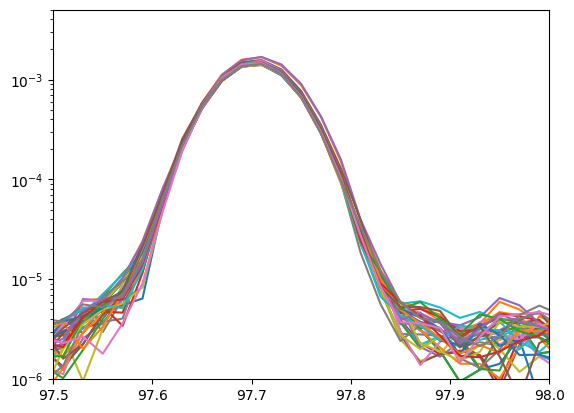

In [ ]:
plt.semilogy(wav,irr[0,:])
plt.semilogy(wav,irr[indmax,:])
plt.xlim(97.5,98)
plt.axvline(w1,linestyle='dashed')
plt.ylim(1e-6,5e-3)

for i in range(0,len(sod),10):
  plt.semilogy(wav,irr[i,:])

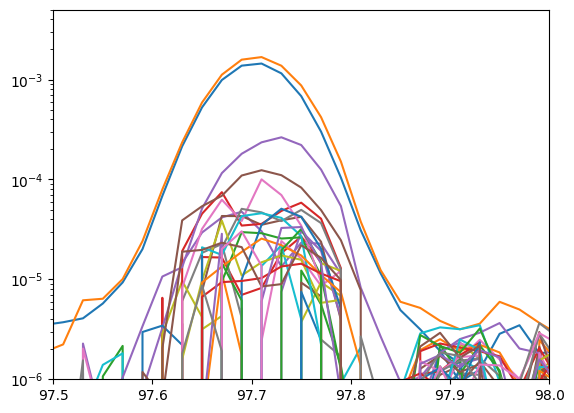

In [ ]:
plt.semilogy(wav,irr[0,:])
plt.semilogy(wav,irr[indmax,:])
plt.xlim(97.5,98)
plt.axvline(w1,linestyle='dashed')
plt.ylim(1e-6,5e-3)

for i in range(0,len(sod),10):
  plt.semilogy(wav,irr[i,:] - irr[0,:])

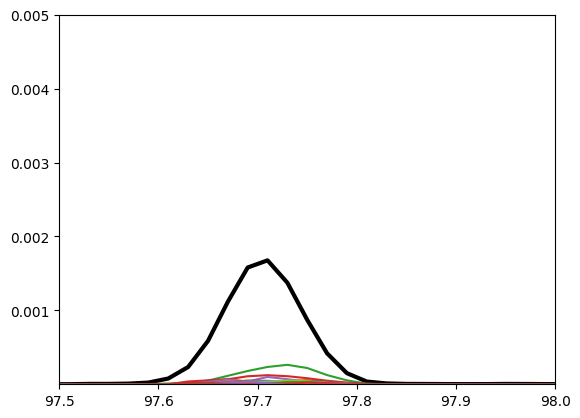

In [ ]:
plt.plot(wav,irr[indmax,:],color='k',linewidth=3)
plt.xlim(97.5,98)
plt.axvline(w1,linestyle='dashed')
plt.ylim(1e-6,5e-3)

for i in range(0,len(sod),10):
  plt.plot(wav,irr[i,:] - irr[0,:])